## DTT Sale Analysis

## Objective: imporove customer experience by analysing sales data and increase Revenue.

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\My GiitHUB\Data Analysis Project\sales\DTT Sales Data.csv", encoding='unicode_escape')

print(df.shape)

df.info()
df.head()

(11251, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.drop(['Status','Unnamed'], axis=1 , inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# which rows are having null values extracting that row
row_with_nulls=df[df.isnull().any(axis=1)]
print(row_with_nulls.to_string())

     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State      Zone   Occupation  Product_Category  Orders  Amount
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   Western    IT Sector              Auto       1     NaN
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   Central  Hospitality              Auto       3     NaN
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh  Southern    IT Sector              Auto       3     NaN
109  1005265    Sakshi  P00296242      F   48               1           Delhi   Central      Banking  Footwear & Shoes       1     NaN
111  1005261   Apoorva  P00057942      F   41               1           Delhi   Central    IT Sector  Footwear & Shoes       2     NaN
184  1005538    Kartik  P00269542      F   49               1       Karnataka  Southern      Banking  Footwear & Shoes       1     NaN
293  1000326  Jonathan  P00120542      M   53          

In [12]:
df['Amount']=df.groupby('Product_Category')['Amount'].transform( lambda a : a.fillna(a.mean()))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [15]:
chk=df[(df['Cust_name']=='Lakshmi') & (df['Product_ID']=='P00045842')]
chk
# as its fload value we moved to round 2
df['Amount']= df['Amount'].round(2)
chk

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
344,1002507,Lakshmi,P00045842,F,35,1,Gujarat,Western,Chemical,Furniture,1,15454.69


In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [17]:

df=df.rename(columns={'Marital_Status':'Married'})
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Married',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [18]:
# summary of the data
df.describe()

,User_ID,Age,Married,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.455449
std,1.716125e+03,12.754122,0.493632,1.115047,5224.435686
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.455449
std,12.754122,1.115047,5224.435686
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


In [20]:
# define function to make it categories in terms of age
def func(age):
     if age < 10 :
         return '0-10'
     if age < 20:
         return '10-20'
     if age < 30:
        return '20-30'
     if age < 40 :
        return '30-40'
     if age < 50:
        return '40-50'
     if age < 60:
        return '50-60'
     else:
        return '60+'
df['Age_group']=df['Age'].apply(func)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Married           State  \
0      1002903    Sanskriti  P00125942      F   28        0     Maharashtra   
1      1000732       Kartik  P00110942      F   35        1  Andhra Pradesh   
2      1001990        Bindu  P00118542      F   35        1   Uttar Pradesh   
3      1001425       Sudevi  P00237842      M   16        0       Karnataka   
4      1000588         Joni  P00057942      M   28        1         Gujarat   
...        ...          ...        ...    ...  ...      ...             ...   
11246  1000695      Manning  P00296942      M   19        1     Maharashtra   
11247  1004089  Reichenbach  P00171342      M   33        0         Haryana   
11248  1001209        Oshin  P00201342      F   40        0  Madhya Pradesh   
11249  1004023       Noonan  P00059442      M   37        0       Karnataka   
11250  1002744      Brumley  P00281742      F   19        0     Maharashtra   

           Zone       Occupation Product_Category  

## Exploratory_data Analysis

## Data Analysis  based on Gender

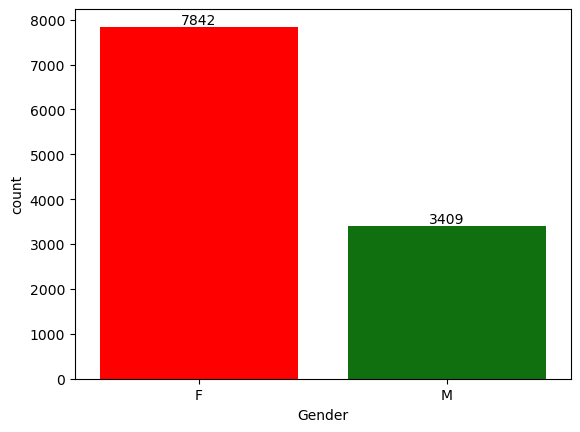

In [21]:
ax=sns.countplot(x='Gender', data=df, color='g')
for bars in  ax.containers:
    ax.bar_label(bars)
ax.patches[0].set_facecolor('red')

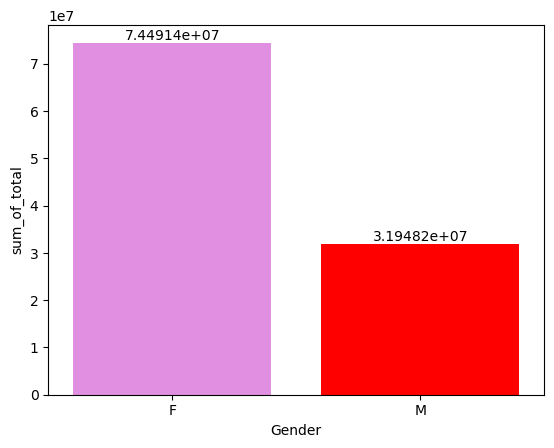

In [22]:
total_amount_of_orders= df.groupby('Gender')['Amount'].sum().reset_index(name='sum_of_total')
res=sns.barplot(x='Gender', y='sum_of_total', data =total_amount_of_orders, color='violet')
for bars in res.containers:
    res.bar_label(bars)
res.patches[1].set_facecolor('red')

*from above graphs most of the buyers are female and purchasing power of female is also female*

## Data Analysis based on Age group

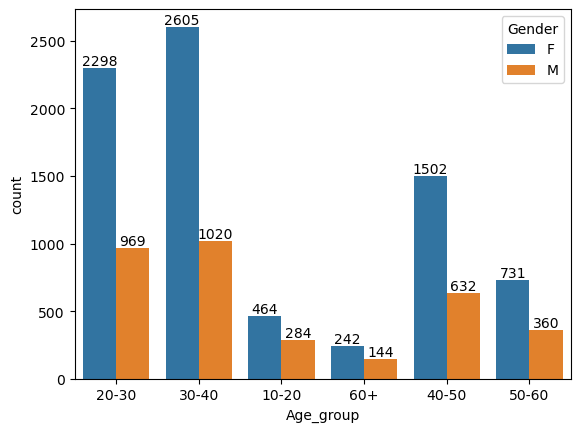

In [26]:
ax=sns.countplot(x='Age_group', data=df , hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

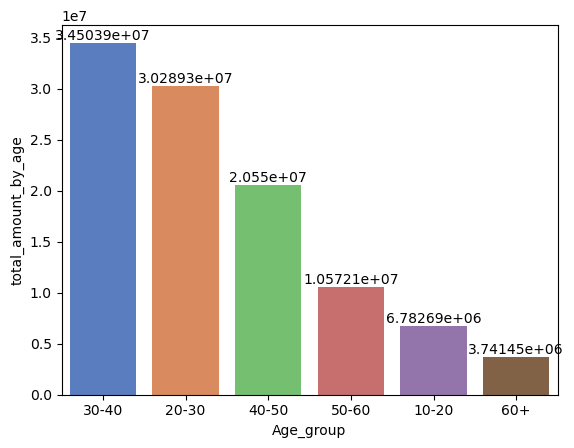

In [27]:
purchasing_power=df.groupby('Age_group') ['Amount'].sum().reset_index(name='total_amount_by_age')
purchase_rate=pd.DataFrame(purchasing_power)
pur=purchase_rate.sort_values(by='total_amount_by_age', ascending=False)
ax=sns.barplot(x=pur['Age_group'], y=pur['total_amount_by_age'],palette='muted')
for i in ax.containers:
    ax.bar_label(i)

*from above graphs most of the buyers are of 30-40 years of age group*

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Married',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

##  Data Analysis based on married

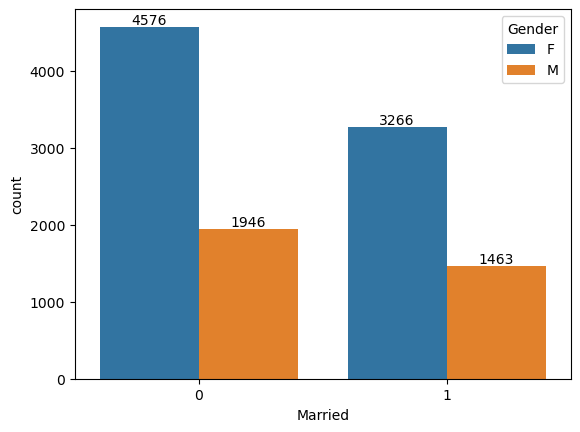

In [31]:
ax2= sns.countplot(x='Married',data=df , hue='Gender')
for i in ax2.containers:
    ax2.bar_label(i)

<Axes: xlabel='Married', ylabel='count'>

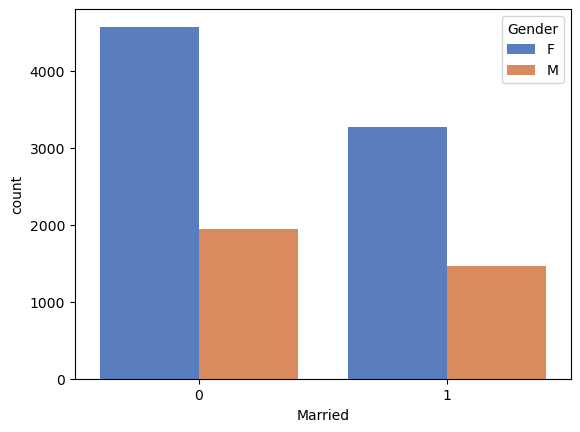

In [32]:
## total count of orders   w.r.t married column:
sns.countplot(data=df,x='Married', palette='muted',hue='Gender')

<Axes: xlabel='Married', ylabel='Amount'>

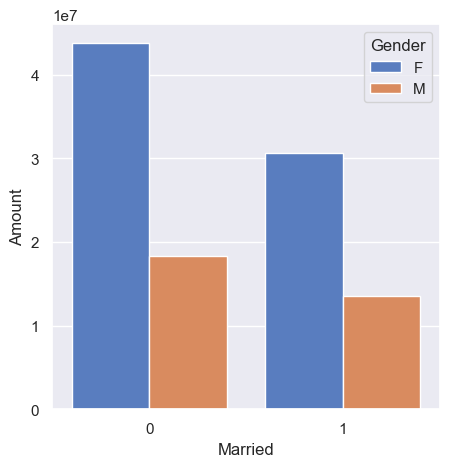

In [35]:
## total Amount of order based on married :
total_amount_by_married=df.groupby(['Married','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=total_amount_by_married,x='Married' , y='Amount',palette='muted', hue='Gender')

*from the above groups we can see unmarried women people are the most buyers and spends more amounts as well !*

<Axes: xlabel='State', ylabel='Orders'>

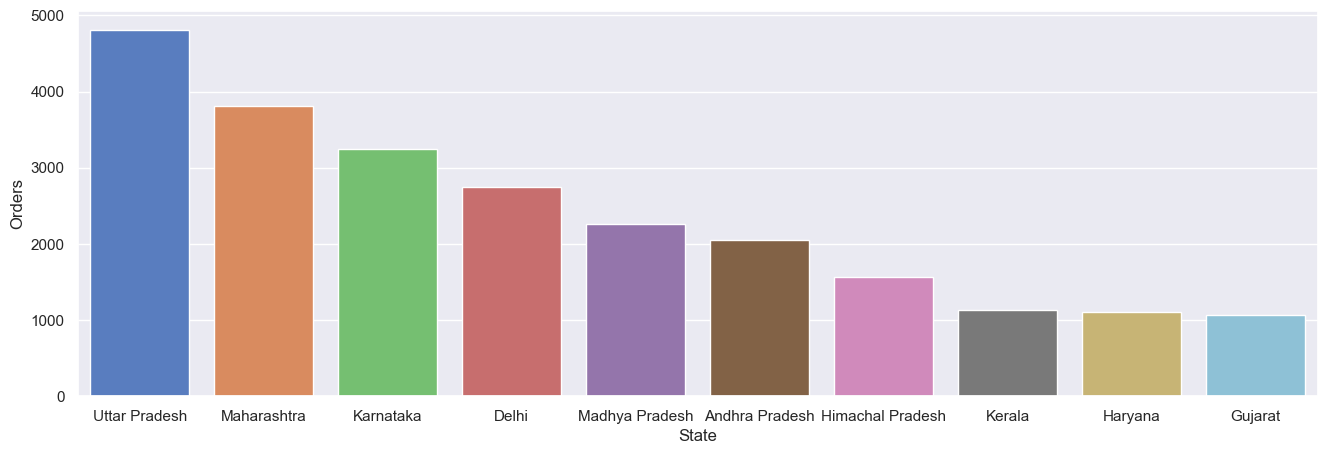

In [36]:
# total of orders in top 10 state
order_by_st = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
order_by_st = pd.DataFrame(order_by_st).reset_index()  #
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=order_by_st, x='State', y='Orders', palette='muted')

<Axes: xlabel='State', ylabel='Amount'>

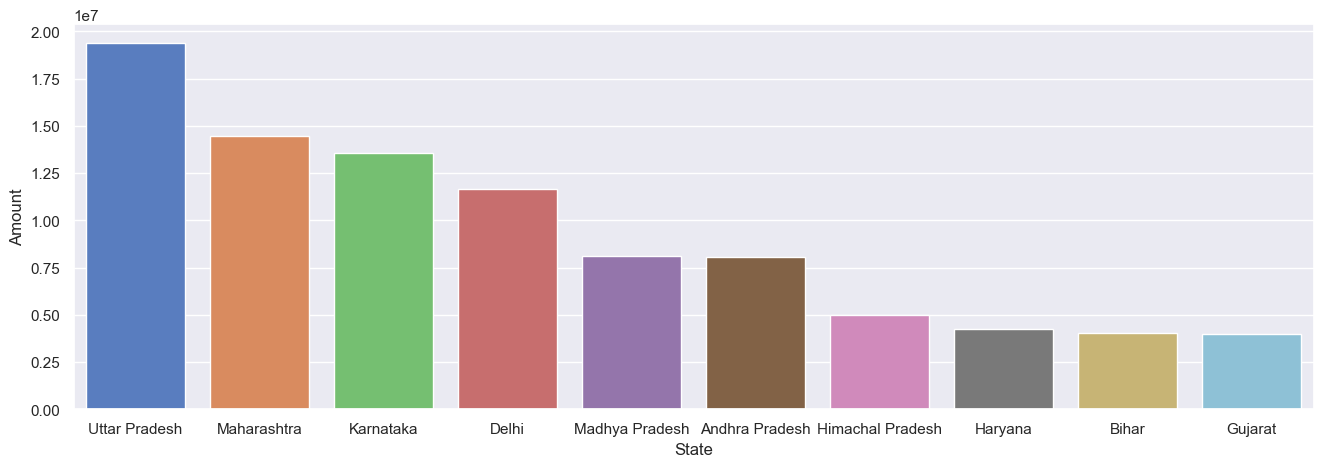

In [37]:
# Total amount of orders in top 10 states
order_by_st = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
order_by_st = pd.DataFrame(order_by_st).reset_index()  # Resetting index for 'State'
sns.set(rc={'figure.figsize': (16, 5)})
sns.barplot(data=order_by_st, x='State', y='Amount', palette='muted')

*here we can see that if the total  orders are hign in kerala but sum of amount is less its not present in  top 10*

# occupation

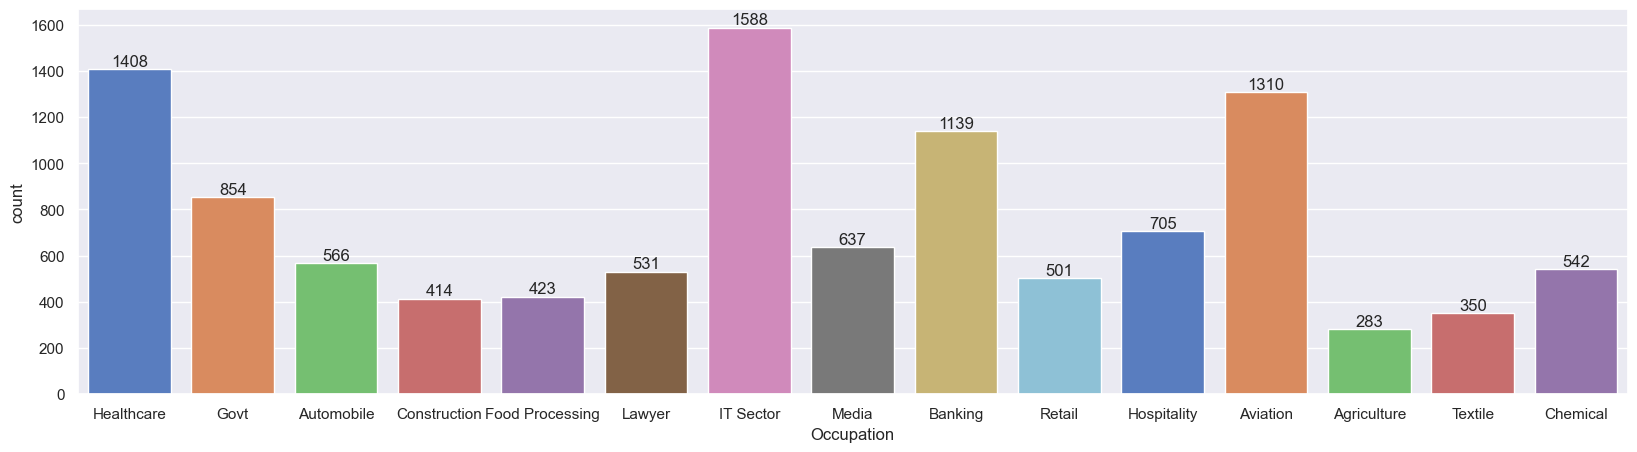

In [38]:
## count of occupation for every buyer

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation', palette='muted')
for i in ax.containers:
    ax.bar_label(i)

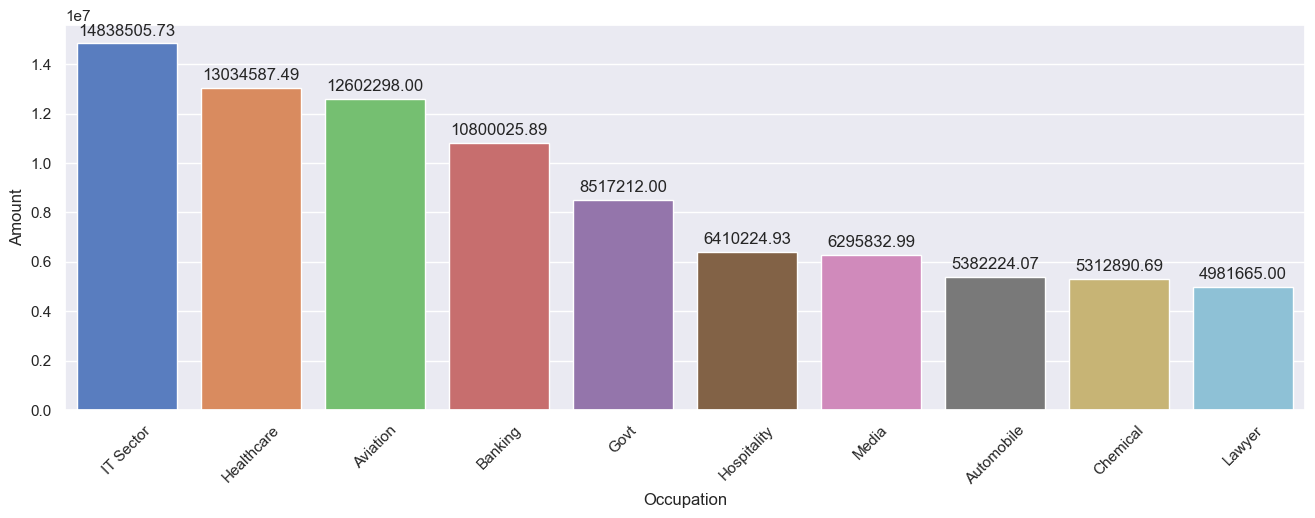

In [39]:
## sum  of  amount of every  occupation for every buyer

order_by_st = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).head(10)
order_by_st = pd.DataFrame(order_by_st)

sns.set(rc={'figure.figsize': (16, 5)})
ax = sns.barplot(data=order_by_st, x=order_by_st.index, y='Amount', palette='muted')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xticks(rotation=45) 
plt.show()

*From the above graphs we can see that all the buyers are working on IT Sector, Healthcare, Aviation*

## product_category

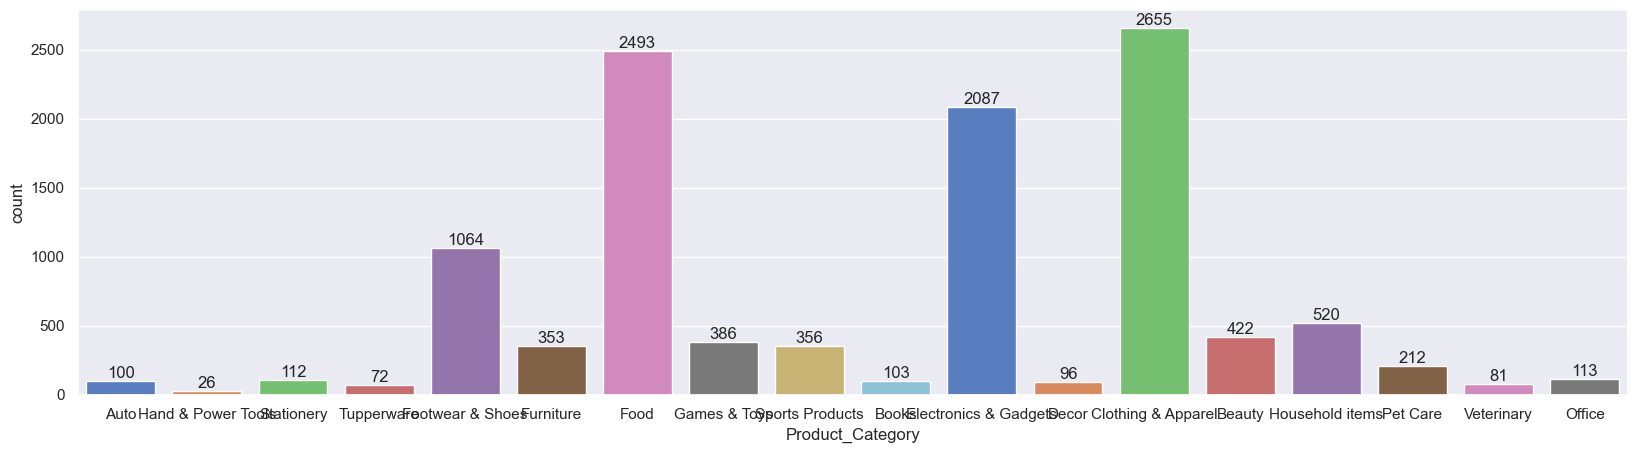

In [41]:
## count of Product_Category for every buyer

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Product_Category', palette='muted')
for i in ax.containers:
    ax.bar_label(i)

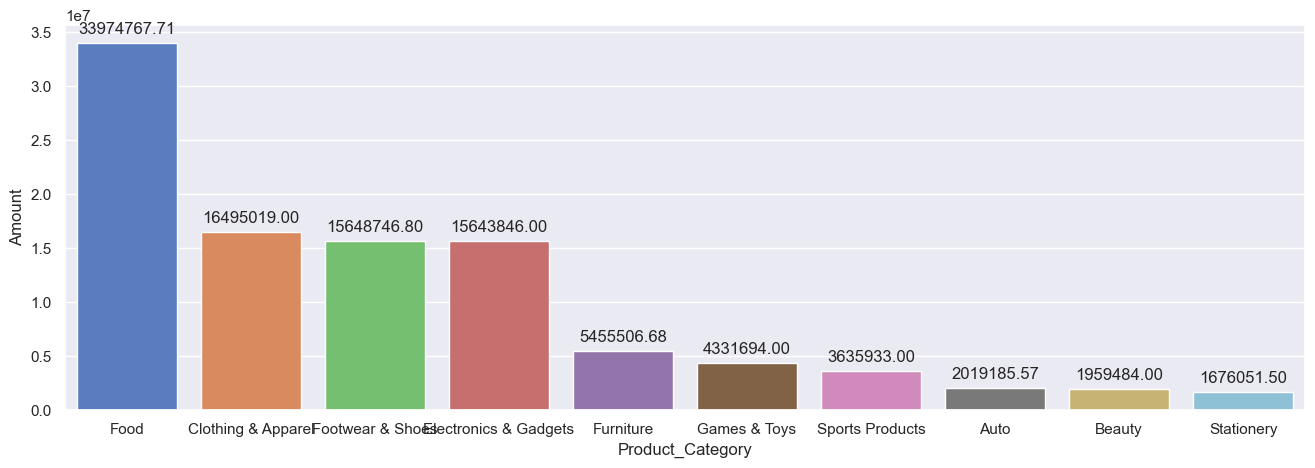

In [42]:
## sum of amount based on product_category

order_by_st = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
order_by_st = pd.DataFrame(order_by_st)
sns.set(rc={'figure.figsize':(16,5)})
ax = sns.barplot(data=order_by_st, x=order_by_st.index, y='Amount', palette='muted') 
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')  

*from the above graphs we can see most of the sold products from food, colthing, and foortwear category*

*Married women with age group of 30-40 from UP,Maharastra, Karnataka are working in IT, helathCare,aviation are mostly buying food, clothing,Footwear Category!*

##### Divan TT 